# Codecademy Project 3: Medical Insurance Modelling with Tensorflow

*This project was completed as a part of the * **Build Deep Learning Models with TensorFlow** *skill path curriculum on Codecademy. The purpose of the project was to practice the using Tensorflow neural networks to perform modelling on a simple dataset before applying the knowledge on a larger project.*

### Introduction

The project focusses on modelling insurance charges for a dataset of US medical insurance costs using Tensorflow deep learning models. The dependent variables are as follows: age, sex, bmi, number of children, whether they smoke or not and the region they are from.


## Methodology

The proposed method of modelling is using neural networks, implemented using Tensorflow.Keras Sequential model. The reason for this is not necessarily due to the suitability of neural networks for this application since, as stated above, this project's purpuse is to practice techniques learned on the Codecademy Deep Learning skill path for a simple application. The `scripts/insurance.py` file performs an iterative RandomizedSearchCV() for a KerasRegressor model. The hyperparameters varied in the tuning process were the batch size and learning rate. In conjunction with this, the effect of varying the design of the model itself was investigated. The model attributes that were varied were: the number of hidden layers, the activation functions, the neurons per layer and the dropout rates.

1000 iterations were performed and the top 20 models were inspected. From these, a final model was obtained was selected based on the performance and computational simplicity of the 20 best performing models and was used to obtain predictions for the test data.

The resulting model included a single hidden layer with 64 neurons, no dropout, and an sigmoid activation function. A batch size of 8 and a learning rate of 0.08 were used to obtain the final model and predicitons. The model's loss convergence and predictions can be found in the outputs folder.

In [11]:
from keras.callbacks import EarlyStopping
import pandas as pd
import matplotlib.pyplot as plt
from scripts.randomsearch import create_model, X_train, y_train, X_test, y_test

In [6]:
# import the model parameters from the random search report
models = pd.read_csv('outputs/reports/model_iterations.csv', usecols=[4, 7, 8, 10, 11, 12, 19], names=['neurons', 'learning_rate', 'hidden_layers', 'dropout_rates', 'batch_size','activation_funcs', 'mean_test_score'], skiprows=[0])
models.head(10)

,neurons,learning_rate,hidden_layers,dropout_rates,batch_size,activation_funcs,mean_test_score
0,"(256, 256, 256, 256, 256)",0.05,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",8,"('sigmoid', 'tanh', 'tanh', 'relu', 'leaky_relu')",-23521570.0
1,"(32, 32, 32, 32, 32)",0.01,3,"[0.09629252509548755, 0.07746652598330844, 0.1...",4,"('leaky_relu', 'leaky_relu', 'leaky_relu', 'le...",-23617203.2
2,"(128, 128, 128, 128, 128)",0.08,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",8,"('sigmoid', 'sigmoid', 'relu', 'leaky_relu', '...",-23741643.2
3,"(64, 256, 256, 256, 256)",0.09,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",9,"('leaky_relu', 'leaky_relu', 'leaky_relu', 'le...",-23747008.4
4,"(32, 32, 64, 128, 128)",0.08,2,"[0.09629252509548755, 0.07746652598330844, 0.1...",3,"('sigmoid', 'sigmoid', 'sigmoid', 'tanh', 'relu')",-23842425.6
5,"(128, 128, 256, 256, 256)",0.09,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",15,"('sigmoid', 'sigmoid', 'tanh', 'relu', 'leaky_...",-23901612.8
6,"(128, 128, 128, 128, 256)",0.08,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",4,"('sigmoid', 'tanh', 'relu', 'leaky_relu', 'lea...",-23943108.4
7,"(32, 32, 32, 64, 256)",0.08,2,"[0.09629252509548755, 0.07746652598330844, 0.1...",10,"('sigmoid', 'relu', 'leaky_relu', 'leaky_relu'...",-23989338.0
8,"(256, 256, 256, 256, 256)",0.02,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",15,"('sigmoid', 'sigmoid', 'leaky_relu', 'leaky_re...",-24004629.6
9,"(64, 64, 128, 128, 256)",0.10,1,"[0.09629252509548755, 0.07746652598330844, 0.1...",7,"('sigmoid', 'sigmoid', 'tanh', 'relu', 'relu')",-24010209.2


## Model Selection

From inspection of the best performing models (shown above), an optimal design was selected based on model performance and computational simplicity. The resulting parameters are listed in the code cell below.

In [12]:
# Define model parameters and hyperparameters
hidden_layers = 1
activation = ['sigmoid']
neurons = [64]
dropout_rate = [0]
learning_rate = 0.08
epochs = 700
batch_size = 8
stopping_patience = 30

# Create and fit the model
model = create_model('mean_squared_error', 'mae', dropout_rate, activation, neurons, hidden_layers, learning_rate)
stop = EarlyStopping(monitor='mae', mode='min', verbose=0, patience=stopping_patience)
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2, callbacks=[stop])

Model Parameters: 
loss: mean_squared_error
metrics: mae
dropout_rate: [0]
activation: ['sigmoid']
neurons: [64]
hidden_layers: 1
learning_rate: 0.08


## Evaluation

The model's evaluation metrics and plots of model convergence and test predictions are shown below.

In [8]:
# Evaluate the model's performance metrics
val_mse, val_mae = model.evaluate(X_test, y_test, verbose = 0) 
print("Validation MSE: ", val_mse)
print("Validation MAE: ", val_mae)

Validation MSE:  20725112.0
Validation MAE:  2793.560791015625


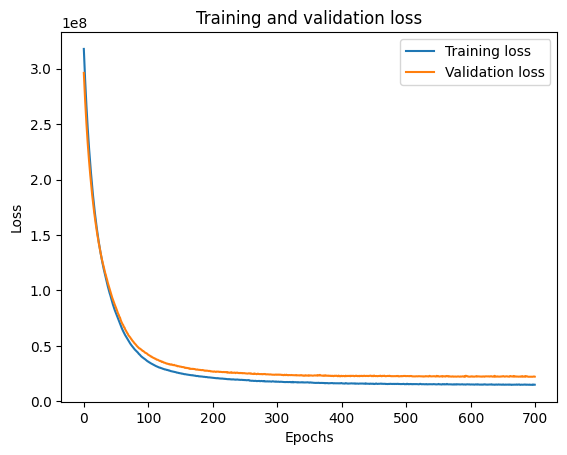

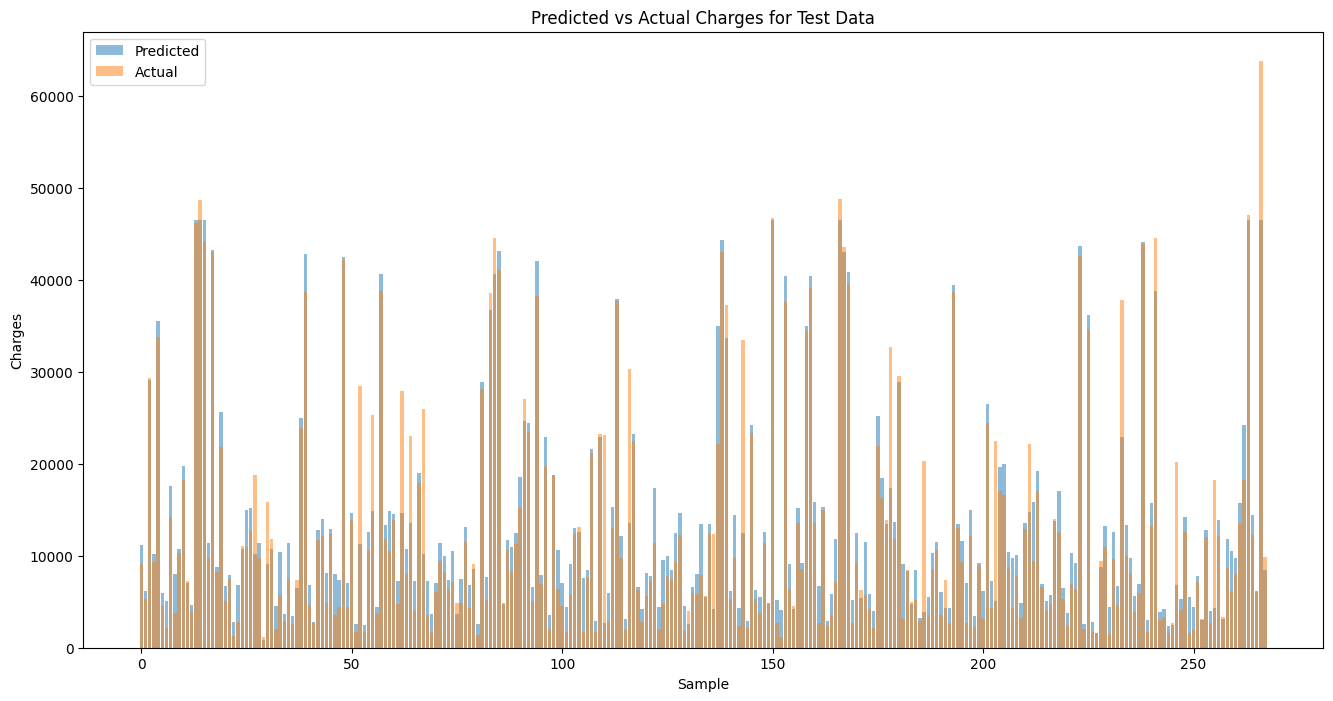

In [9]:
# plot the training and validation loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('outputs/plots/loss_history.png')
plt.show()

# Calculate Predictions for Test Data
y_pred = model.predict(X_test, verbose = 0) # make predictions
y_pred = y_pred.reshape(-1) # reshape predictions
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) # create a dataframe of the actual and predicted values
df.to_csv('outputs/reports/final_predictions.csv', index=False) # save the dataframe to a csv file

# Plot the Predictions
fig, ax = plt.subplots(figsize=(16,8)) # create a figure and axis
plt.bar(range(len(y_pred)), y_pred, label='Predicted', alpha=0.5) # plot the predicted values
plt.bar(range(len(y_test)), y_test, label='Actual', alpha=0.5) # plot the actual values
plt.legend()
plt.title('Predicted vs Actual Charges for Test Data')
plt.ylabel('Charges')
plt.xlabel('Sample')
fig.savefig('outputs/plots/predictions.png')
plt.show()


## Conclusions

From the plot of predictions we can see that the model obtained reasonable predictions for a large proportion of the data. However, for a small proportion of the data, the model predictions were much lower than the true values. This might suggest that there is another variable that is not observed in the data that is skewing the data for these values and hence the model is not able to accurately evaluate them. Performing multiple linear regression on the dataset is recommended for further work to verify this theory and ensure that the model's inability to fit to these points is not due to any mistakes made during modelling.